In [ ]:
from google.colab import files
uploaded = files.upload()


Saving eda-small.csv to eda-small.csv


## Generator Interconnection or Modification request (GIM) Project Details - Large Generators


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# data from https://www.ercot.com/mp/data-products/data-product-details?id=pg7-200-er September 2025
df = pd.read_csv('eda-large.csv')
df.head()


,INR,Project Name,GIM Study Phase,Interconnecting Entity,POI Location,County,CDR Reporting Zone,Projected COD,Fuel,Technology,...,GHG Permit,Water Availability,Meets Planning,Meets All Planning,Unnamed: 25,Construction Start,Construction End,Approved for Energization,Approved for Synchronization,Comment
0,15INR0064b,Harald (BearKat Wind B),"SS Completed, FIS Completed, IA","McCrae Wind Energy II, LLC",59903 Bearkat 345kV,Glasscock,WEST,10/31/25,WIN,WT,...,Not Required,Not Required,5/30/18,9/19/18,1/22/19,NaN,NaN,2/10/20,5/12/20,NaN
1,16INR0049,Nazareth Solar,"SS Completed, FIS Started, IA","TX Nazareth Solar, LLC",tap 345kV 23914 Tule Canyon - 23912 Ogallala C2,Castro,PANHANDLE,8/5/27,SOL,PV,...,Not Required,Not Required,3/22/24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16INR0081,Mesteno Wind,"SS Completed, FIS Completed, IA","Mesteno Windpower, LLC",80355 Del Sol 345kV,Starr,SOUTH,6/30/25,WIN,WT,...,Not Required,Not Required,4/25/18,3/28/19,4/1/19,NaN,NaN,11/26/19,12/12/19,NaN
3,16INR0085,Priddy Wind,"SS Completed, FIS Completed, IA",ENGIE North America,tap 345kV 1444 Brown – 3422 Killeen,Mills,NORTH,12/30/25,WIN,WT,...,Not Required,Not Required,3/29/21,4/30/21,4/30/21,NaN,NaN,10/13/21,11/19/21,NaN
4,16INR0104,Big Sampson Wind,"SS Completed, FIS Completed, IA","Big Sampson Wind Project, LLC",tap 345kV 76015 Cedar Canyon - 7053 Noelke,Crockett,WEST,10/4/25,WIN,WT,...,Not Required,Not Required,10/31/24,11/4/24,11/4/24,NaN,NaN,6/4/25,6/16/25,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1847 entries, 0 to 1846
Data columns (total 31 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   INR                                                                                         1847 non-null   object 
 1   Project Name                                                                                1847 non-null   object 
 2   GIM Study Phase                                                                             1847 non-null   object 
 3   Interconnecting Entity                                                                      1847 non-null   object 
 4   POI Location                                                                                1847 non-null   object 
 5   County                                   

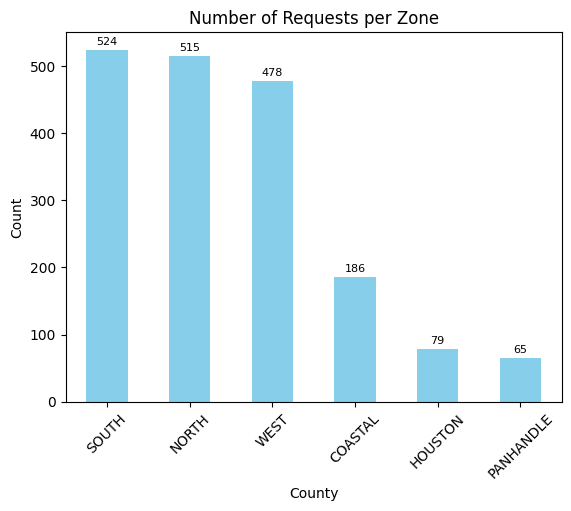

In [ ]:
# --- Bar chart 1: counts per county ---
ax1 = df['CDR Reporting Zone'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Requests per Zone')
plt.xlabel('County')
plt.ylabel('Count')
plt.xticks(rotation=45)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=2)

plt.show()


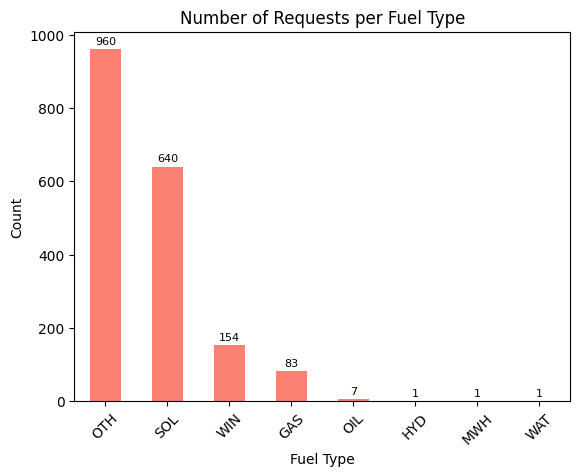

In [ ]:
# --- Bar chart 2: counts per fuel ---
ax2 = df['Fuel'].value_counts().plot(kind='bar', color='salmon')
plt.title('Number of Requests per Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=2)

plt.show()

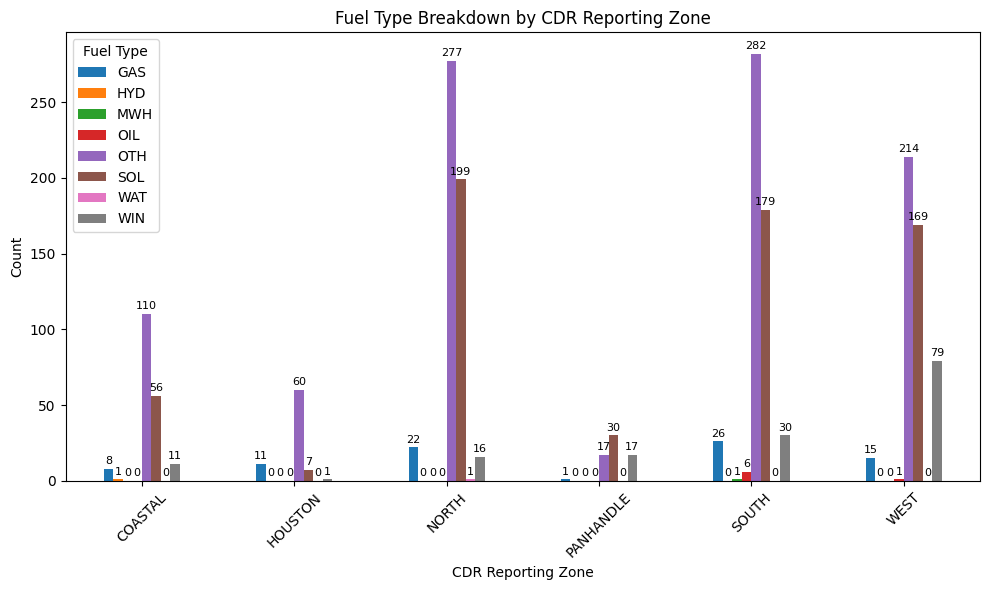

In [ ]:
# pivot table (counts of fuel types per CDR Reporting Zone)
zone_fuel_counts = df.groupby(['CDR Reporting Zone', 'Fuel']).size().unstack(fill_value=0)

# grouped bar chart
ax = zone_fuel_counts.plot(kind='bar', figsize=(10,6))

plt.title('Fuel Type Breakdown by CDR Reporting Zone')
plt.xlabel('CDR Reporting Zone')
plt.ylabel('Count')
plt.legend(title='Fuel Type')
plt.xticks(rotation=45)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=2)

plt.show()


## Generator Interconnection or Modification request (GIM) Project Details - Small Generators

In [ ]:
df2 = pd.read_csv('eda-small.csv')
df2.head()

,INR,Project Name,Model Ready Date,Interconnecting Entity,POI Location,County,CDR Reporting Zone,Projected COD,Fuel,Technology,Capacity (MW),"Change indicators: Proj Name, MW",IA Signed,Financial Security,Approved for Energization,Approved for Synchronization,Comment
0,12INR0059b,HOVEY (Barilla Solar 1B),9/2/15,First Solar,60385 Solstice 138kV,Pecos,WEST,11/30/25,SOL,PV,7.40,NaN,12/26/13,Yes,9/2/15,9/14/15,NaN
1,22INR0596,Grizzly Ridge BESS SLF,9/1/22,Grizzly Ridge Solar LLC,Pottsville Switching Substation (Bus# 178),Hamilton,NORTH,7/1/26,OTH,BA,0.00,NaN,10/18/21,Yes,2/10/23,NaN,NaN
2,22INR0608,Wharton BESS,5/1/25,I-eye Storage LLC,"Property: 29.3134928 N, 96.1081571 W. Site...",Wharton,SOUTH,11/18/25,OTH,BA,9.96,NaN,3/18/24,Yes,NaN,NaN,NaN
3,23INR0483,Rio Nogales CT1 Rotor Replacement,4/12/23,CPS Energy,Rio Nogales Substation\n5362 RIONOG 345kV,Guadalupe,SOUTH,6/8/23,GAS,CC,3.10,NaN,1/20/23,Yes,NaN,4/27/23,NaN
4,23INR0499,Laureles BESS,9/5/24,Regis Laureles LLC,Station Name (TDSP Station Code) LAURELES;\nLo...,Cameron,COASTAL,11/12/25,OTH,BA,9.90,NaN,2/16/23,Yes,5/23/25,7/15/25,NaN


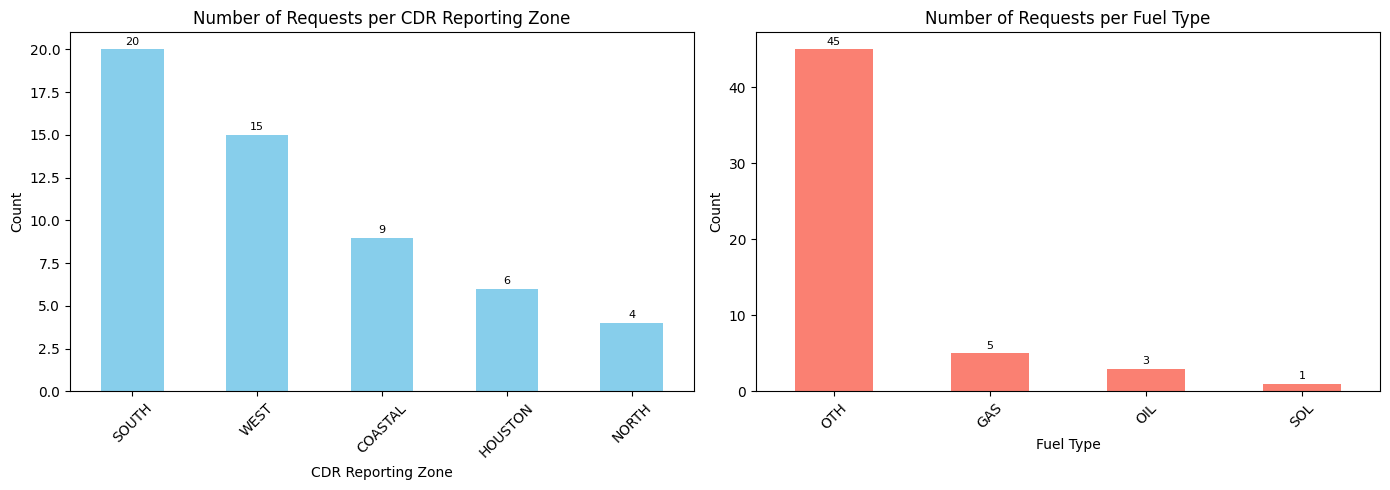

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Plot 1: counts of each CDR Reporting Zone ---
df2['CDR Reporting Zone'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Number of Requests per CDR Reporting Zone')
axes[0].set_xlabel('CDR Reporting Zone')
axes[0].set_ylabel('Count')

# --- Plot 2: counts of each Fuel Type ---
df2['Fuel'].value_counts().plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Number of Requests per Fuel Type')
axes[1].set_xlabel('Fuel Type')
axes[1].set_ylabel('Count')

# --- Apply same formatting + labels to both ---
for ax in axes:
    ax.tick_params(axis='x', rotation=45)
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=2)

plt.tight_layout()
plt.show()


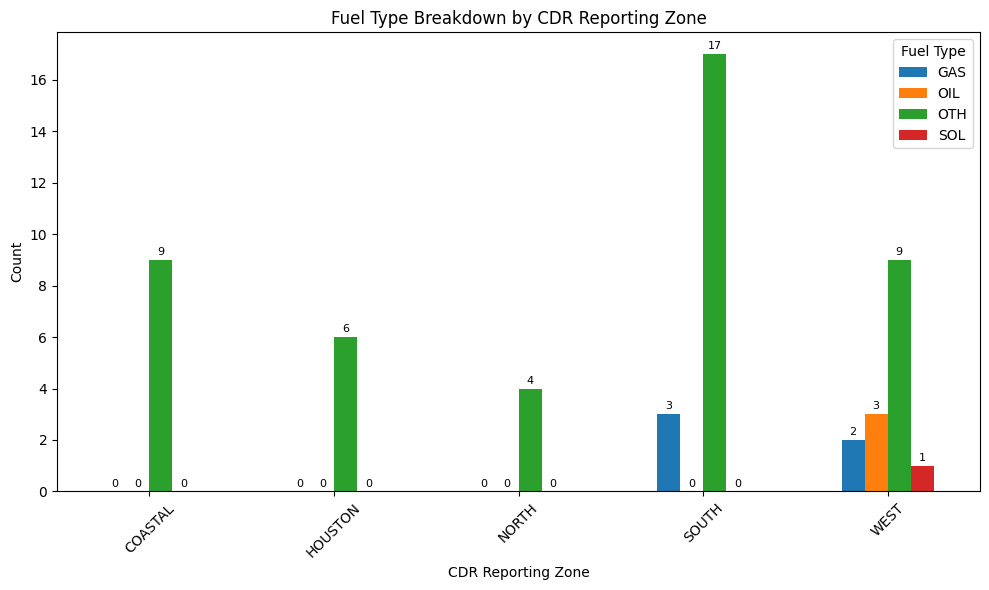

In [ ]:
# pivot table (counts of fuel types per CDR Reporting Zone)
zone_fuel_counts = df2.groupby(['CDR Reporting Zone', 'Fuel']).size().unstack(fill_value=0)

# grouped bar chart
ax = zone_fuel_counts.plot(kind='bar', figsize=(10,6))

plt.title('Fuel Type Breakdown by CDR Reporting Zone')
plt.xlabel('CDR Reporting Zone')
plt.ylabel('Count')
plt.legend(title='Fuel Type')
plt.xticks(rotation=45)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=2)

plt.show()


## Wind Variability

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df3 = pd.read_csv('1415054_29.68_-95.41_2020_5cabb31211ba99cbc5595a94e065ab9b.csv', header=0)
df3.head()

,Year,Month,Day,Hour,Minute,wind speed at 100m (m/s),wind direction at 100m (deg)
0,2020,1,1,0,0,3.51,61.31
1,2020,1,1,1,0,3.32,58.91
2,2020,1,1,2,0,3.08,55.93
3,2020,1,1,3,0,3.05,60.55
4,2020,1,1,4,0,3.20,56.02


<Figure size 1000x600 with 0 Axes>

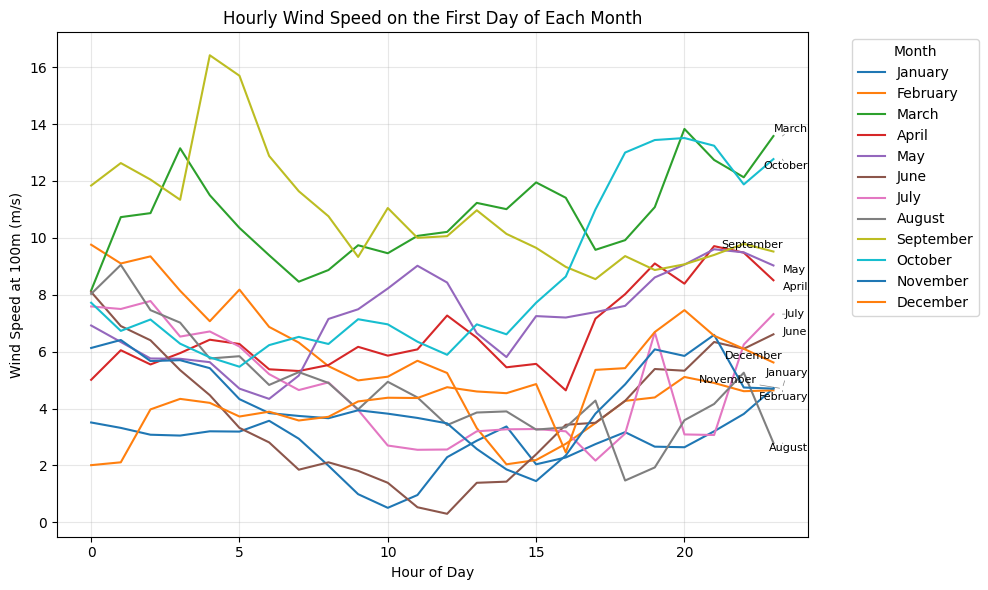

In [ ]:
import matplotlib.pyplot as plt
import calendar
from adjustText import adjust_text

df_first_day = df3[df3['Day'] == 1]

# Month number → name mapping
month_names = {i: calendar.month_name[i] for i in range(1, 13)}

plt.figure(figsize=(10,6))

texts = []

for month in sorted(df_first_day['Month'].unique()):
    subset = df_first_day[df_first_day['Month'] == month]
    plt.plot(subset['Hour'], subset['wind speed at 100m (m/s)'], label=month_names[month])

    texts.append(
        plt.text(
            subset['Hour'].iloc[-1] + 0.3,
            subset['wind speed at 100m (m/s)'].iloc[-1],
            month_names[month],
            fontsize=8, va='center'
        )
    )

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.title('Hourly Wind Speed on the First Day of Each Month')
plt.xlabel('Hour of Day')
plt.ylabel('Wind Speed at 100m (m/s)')
plt.grid(alpha=0.3)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

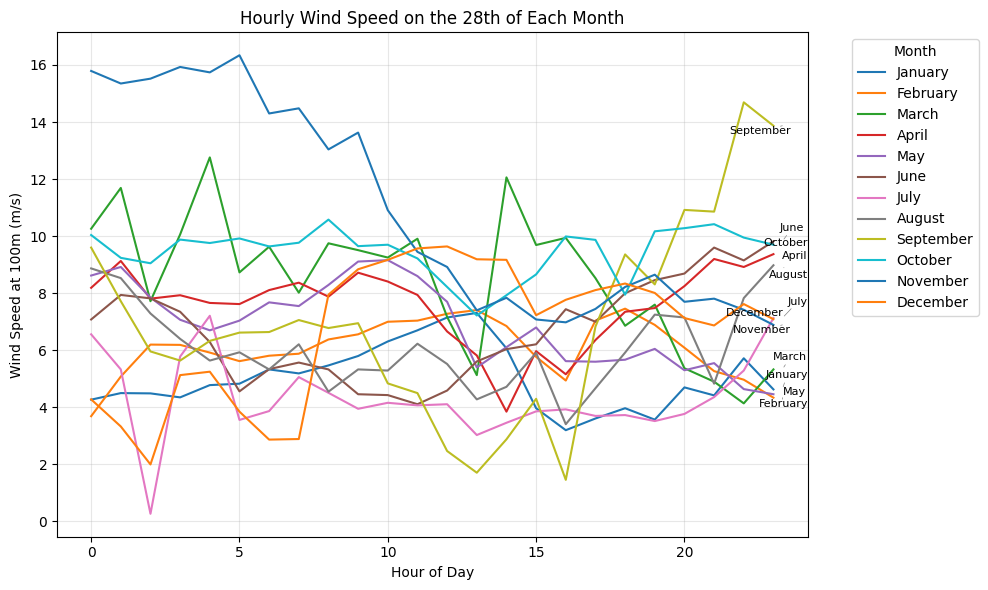

In [ ]:
df_last_day = df3[df3['Day'] == 28]

# Month number → name mapping
month_names = {i: calendar.month_name[i] for i in range(1, 13)}

plt.figure(figsize=(10,6))

texts = []

for month in sorted(df_last_day['Month'].unique()):
    subset = df_last_day[df_last_day['Month'] == month]
    plt.plot(subset['Hour'], subset['wind speed at 100m (m/s)'], label=month_names[month])

    texts.append(
        plt.text(
            subset['Hour'].iloc[-1] + 0.3,
            subset['wind speed at 100m (m/s)'].iloc[-1],
            month_names[month],
            fontsize=8, va='center'
        )
    )

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.title('Hourly Wind Speed on the 28th of Each Month')
plt.xlabel('Hour of Day')
plt.ylabel('Wind Speed at 100m (m/s)')
plt.grid(alpha=0.3)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()